In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-pines-hyperspectral-dataset/indianpinearray.npy
/kaggle/input/indian-pines-hyperspectral-dataset/IPgt.npy


In [3]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"   

--2024-10-21 14:01:22--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat [following]
--2024-10-21 14:01:22--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M  6.26MB/s    in 0.9s    

2024-10-21 14:01:23 (6.26 MB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

URL transformed to HTTPS due to an HSTS policy
--2024-10-21 14:01:24--  https://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.e

In [5]:
from scipy.io import loadmat

In [6]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [7]:
#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()

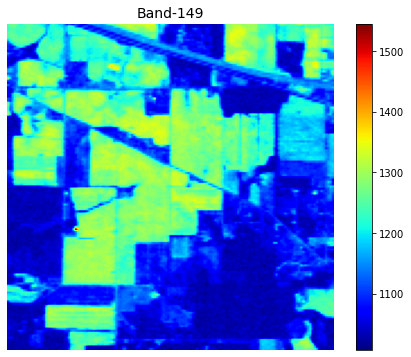

In [9]:
plot_band(dataset)

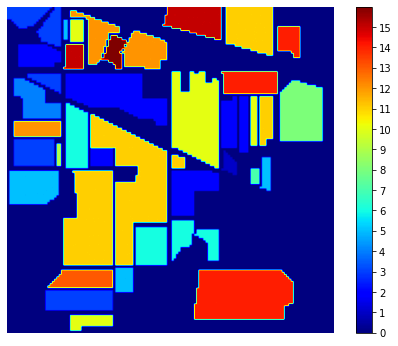

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

In [11]:
from tqdm import tqdm

In [12]:
dataset[:,:,2].ravel().shape

(21025,)

In [13]:
ser = pd.Series(dataset[0][0])

In [14]:
ser

0      3172
1      4142
2      4506
3      4279
4      4782
       ... 
195    1062
196    1069
197    1057
198    1020
199    1020
Length: 200, dtype: uint16

In [15]:
df_temp = pd.DataFrame()
temp = pd.Series([1,3])
df_temp = pd.concat([temp,ser])

In [16]:
df_temp

0         1
1         3
0      3172
1      4142
2      4506
       ... 
195    1062
196    1069
197    1057
198    1020
199    1020
Length: 202, dtype: int64

In [17]:
pd.DataFrame(dataset[0,0])

,0
0,3172
1,4142
2,4506
3,4279
4,4782
...,...
195,1062
196,1069
197,1057
198,1020


In [18]:
df_new = pd.DataFrame()
for i in tqdm(range(dataset.shape[0])):
    for j in range(dataset.shape[1]):
        df_new=pd.concat([df_new,pd.Series([i,j]),pd.Series(dataset[i,j])],axis=0)     

100%|██████████| 145/145 [04:17<00:00,  1.78s/it]


In [19]:
row_list = []
for i in range(0,145):
    for j in range(0,145):
        row_list.append(i)
        
col_list = []
for i in range(0,145):
    for j in range(0,145):
        col_list.append(j)
        
row_series = pd.Series(row_list)
col_series = pd.Series(col_list)

In [20]:
row_series

0          0
1          0
2          0
3          0
4          0
        ... 
21020    144
21021    144
21022    144
21023    144
21024    144
Length: 21025, dtype: int64

In [21]:
dataset[:,:,0].shape

(145, 145)

In [22]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    df = pd.concat([df,row_series,col_series],axis=1)
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = ['pixel_row', 'pixel_col']+[f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [23]:
df = extract_pixels(dataset, ground_truth)

100%|██████████| 200/200 [00:02<00:00, 91.47it/s]


In [24]:
df.head()

,pixel_row,pixel_col,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,0,0,3172,4142,4506,4279,4782,5048,5213,5106,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,0,1,2580,4266,4502,4426,4853,5249,5352,5353,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,0,2,3687,4266,4421,4498,5019,5293,5438,5427,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,0,3,2749,4258,4603,4493,4958,5234,5417,5355,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,0,4,2746,4018,4675,4417,4886,5117,5215,5096,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [25]:
df.shape

(21025, 203)

In [26]:
df.to_csv('Dataset.csv', index=False)

In [27]:
df.iloc[:,2]

0        3172
1        2580
2        3687
3        2749
4        2746
         ... 
21020    2561
21021    2726
21022    3153
21023    3155
21024    3323
Name: band-1, Length: 21025, dtype: uint16

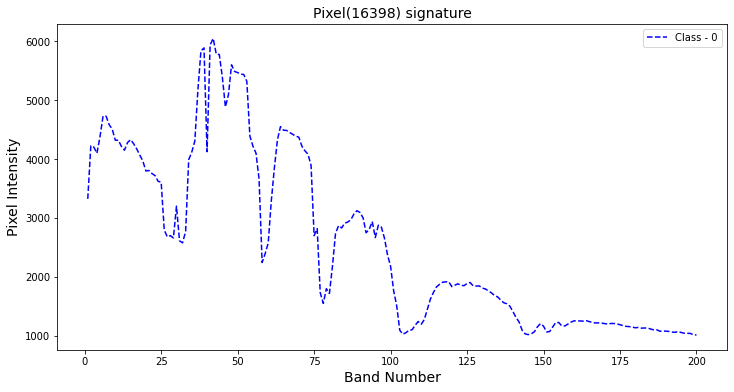

In [28]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, 2:-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()
    
plot_signature(df)

In [29]:
df.loc[:,'class'].unique()

array([ 3,  0, 15, 11, 12,  5, 10, 14, 16,  2,  4,  8,  6,  9,  1,  7, 13],
      dtype=uint8)

In [30]:
df.loc[:, 'class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

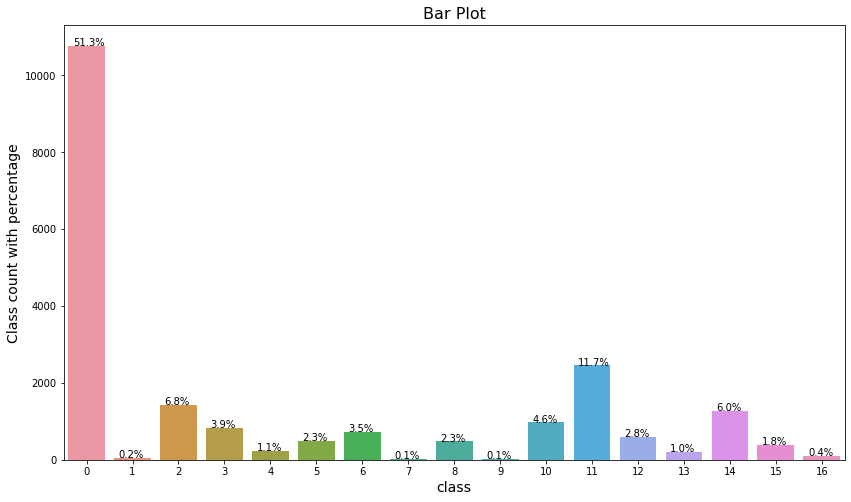

In [31]:
import seaborn as sns

plt.figure(figsize=(14, 8))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))

plt.ylabel('Class count with percentage', fontsize=14)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

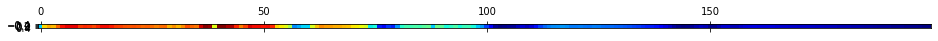

In [32]:
# Visualizing the pixel
plt.matshow(df.iloc[1, 2:-1].values.reshape(1,200), cmap='jet');

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_pixel(pixel, n):
    ax = plt.gca()
    im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')
    plt.title(f'pixel - {n}')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

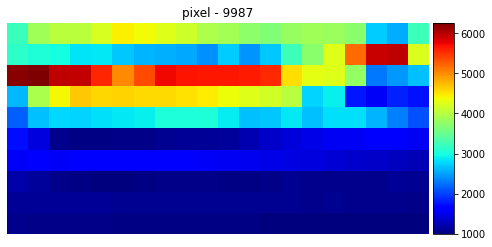

In [34]:
plt.figure(figsize=(8, 4))

rand_n = np.random.randint(df.shape[0])

plot_pixel(df.iloc[rand_n, 2:-1].values, rand_n)

In [35]:
type(df['band-1'])

pandas.core.series.Series

Enter the band Number(1-200) : 99


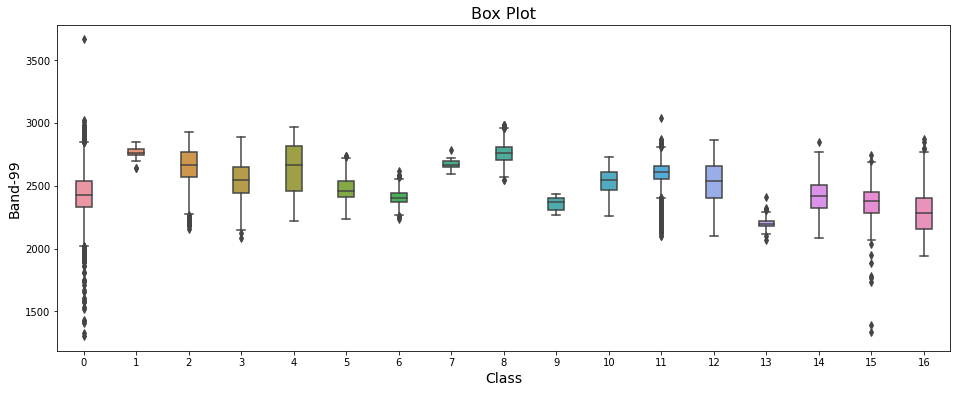

In [36]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-200) :'))
sns.boxplot( x=df["class"], y=df[str('band-'+str(n))], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

## PCA

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('Dataset.csv')

In [39]:
df.head()

,pixel_row,pixel_col,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,0,0,3172,4142,4506,4279,4782,5048,5213,5106,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,0,1,2580,4266,4502,4426,4853,5249,5352,5353,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,0,2,3687,4266,4421,4498,5019,5293,5438,5427,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,0,3,2749,4258,4603,4493,4958,5234,5417,5355,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,0,4,2746,4018,4675,4417,4886,5117,5215,5096,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [40]:
X = df.iloc[:, 2:-1].values

y = df.iloc[:, -1].values

In [41]:
X.shape,y.shape

((21025, 200), (21025,))

In [42]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X)
ev = pca.explained_variance_ratio_

In [43]:
ev

array([6.84937994e-01, 2.35313708e-01, 1.49635476e-02, 8.21541515e-03,
       6.95011265e-03, 5.17010703e-03, 3.99681431e-03, 3.62359687e-03,
       3.07127396e-03, 2.93211894e-03, 2.67352983e-03, 2.49230109e-03,
       2.24688362e-03, 1.89388746e-03, 1.69433599e-03, 1.56043463e-03,
       1.53162479e-03, 1.35012968e-03, 1.00136991e-03, 9.24871001e-04,
       8.47880866e-04, 7.64379855e-04, 6.64586596e-04, 6.45648948e-04,
       6.16138953e-04, 5.60771225e-04, 5.43114317e-04, 5.14815335e-04,
       4.18633797e-04, 3.62654652e-04])

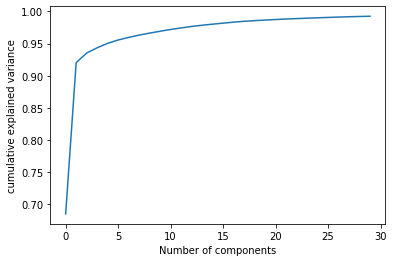

In [44]:
plt.plot(np.cumsum(ev))
plt.xlabel("Number of components")
plt.ylabel("cumulative explained variance")
plt.show()

<AxesSubplot:xlabel='Number of components'>

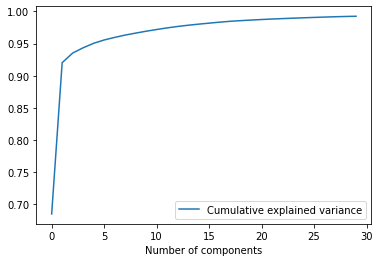

In [45]:
# Interactive plot
df3 = pd.DataFrame(ev, columns=['Cumulative explained variance']).cumsum()
df3['Number of components'] = pd.Series(list(range(30)))
df3.plot(x='Number of components', y='Cumulative explained variance')

In [46]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.20)

In [47]:
X_train.shape, X_test.shape


((16820, 30), (4205, 30))

# RF

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(40, 50),               # Number of trees
    'max_depth': [None, 10, 20, 30,],              # Maximum depth of each tree
    'min_samples_split': np.arange(10, 20),             # Minimum samples to split a node
    'min_samples_leaf': np.arange(1, 10),              # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2', None],       # Number of features to consider for split
    'bootstrap': [True, False],                           # Bootstrap samples
    'criterion': ['gini', 'entropy'],                     # Criterion for measuring split quality
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # Number of different hyperparameter combinations to try
                                   cv=5,       # 5-fold cross-validation
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters found
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best estimator
best_rf_classifier = random_search.best_estimator_

# Perform cross-validation for better accuracy estimation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean():.4f}")

# Predict on the test data
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.0min


[CV] n_estimators=48, min_samples_split=15, min_samples_leaf=5, max_features=None, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=15, min_samples_leaf=5, max_features=None, max_depth=10, criterion=gini, class_weight=balanced, bootstrap=False, total=  40.3s
[CV] n_estimators=47, min_samples_split=16, min_samples_leaf=2, max_features=None, max_depth=None, criterion=gini, class_weight=balanced_subsample, bootstrap=False 
[CV]  n_estimators=47, min_samples_split=16, min_samples_leaf=2, max_features=None, max_depth=None, criterion=gini, class_weight=balanced_subsample, bootstrap=False, total=  59.5s
[CV] n_estimators=42, min_samples_split=13, min_samples_leaf=6, max_features=log2, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=42, min_samples_split=13, min_samples_leaf=6, max_features=log2, max_depth=None, criterion=entropy, class_weight=balanced, bootstrap=False, total=  15.3s
[CV

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.2min



[CV]  n_estimators=45, min_samples_split=13, min_samples_leaf=4, max_features=log2, max_depth=None, criterion=gini, class_weight=balanced_subsample, bootstrap=True, total=   5.3s
[CV] n_estimators=45, min_samples_split=12, min_samples_leaf=2, max_features=auto, max_depth=20, criterion=gini, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=45, min_samples_split=12, min_samples_leaf=2, max_features=auto, max_depth=20, criterion=gini, class_weight=balanced_subsample, bootstrap=True, total=   6.5s
[CV] n_estimators=45, min_samples_split=12, min_samples_leaf=2, max_features=auto, max_depth=20, criterion=gini, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=45, min_samples_split=12, min_samples_leaf=2, max_features=auto, max_depth=20, criterion=gini, class_weight=balanced_subsample, bootstrap=True, total=   6.7s
[CV] n_estimators=41, min_samples_split=11, min_samples_leaf=9, max_features=sqrt, max_depth=10, criterion=gini, class_weight=None, bootstrap=

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 17.2min finished


Best hyperparameters: {'n_estimators': 43, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}
Cross-validated accuracy: 0.7683
Random Forest Accuracy: 0.7838
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1576
           1       1.00      0.62      0.77         8
           2       0.71      0.65      0.68       229
           3       0.85      0.61      0.71       130
           4       0.67      0.49      0.56        37
           5       0.98      0.72      0.83        69
           6       0.83      0.64      0.72       107
           7       0.67      0.50      0.57         4
           8       0.85      0.96      0.90        70
           9       0.00      0.00      0.00         2
          10       0.79      0.83      0.81       157
          11       0.76      0.84      0.80       384
          12 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
